In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats

In [211]:
#df = pd.read_csv('jordan_food_price.csv')
df=pd.read_csv('wfp_food_prices_jor_h_date.csv')
population_df=pd.read_csv("Population in Jordan.csv")
deaths_df=pd.read_excel('number of war deaths.xlsx')
df.head(20)

,date,market,category,commodity,unit,price,H-date
0,1/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,10/02/1432
1,1/15/2011,National Average,cereals and tubers,Rice (imported),KG,0.90,11/02/1432
2,1/15/2011,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,12/02/1432
3,1/15/2011,National Average,pulses and nuts,Pulses,KG,1.20,13/02/1432
4,2/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,14/02/1432
5,2/15/2011,National Average,cereals and tubers,Rice (imported),KG,1.07,15/02/1432
6,2/15/2011,National Average,oil and fats,Oil (vegetable),1.8 L,1.60,16/02/1432
7,2/15/2011,National Average,pulses and nuts,Pulses,KG,1.27,17/02/1432
8,3/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,10/04/1432
9,3/15/2011,National Average,cereals and tubers,Rice (imported),KG,1.04,10/04/1432


# data prep

## df prep

In [212]:
# df['year']=df['date'].apply(lambda x: int(str(x).split(sep='/')[2]))
# df['month']=df['date'].apply(lambda x: int(x.split(sep='/')[0]))
df.drop_duplicates(inplace=True) # droping the duplicates if there is any

df['date'] = pd.to_datetime(df['date']) # to make new columns year , month
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year 

df = df.loc[df.year > 2011 ] # filltering the data 

df['H-month']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]))  # to make new columns hijri month
df['is_ramdan']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]) in [8,9,10]) # to make new columns with true false values (true when hijri months is equal to 8,9,10)

df.drop(['date','H-date'],axis=1,inplace=True) # droping the un needed columns 




In [213]:
# units=['12.5 KG' ,'1.8 L' ,'2 KG' ,'300 G' ,'160 G' ,'750 G' ,'170 G' ,'0.8 KG' ,'1.5 KG']

# for i in range(len(df)):
#     unit=1
#     if 'L' ==  str(df.loc[[i],["unit"]]):
#         unit=1
#     elif 'KG' ==  str(df.loc[[i],["unit"]]):
#        unit=1
#     elif str(df.loc[[i],["unit"]]) in units:
#         if 'G' == str(df.loc[[2],["unit"]]).split(' ')[-2:][1]:
#             unit=float(str(df.loc[[2],["unit"]]).split(' ')[-2:][0])/1000
#         else: 
#             unit=float(str(df.loc[[2],["unit"]]).split(' ')[-2:][0])
        
#     df.loc[[i],["price/unit"]]= df.loc[[i],["price"]].values[0][0]/unit


In [214]:
df.head(5)

,market,category,commodity,unit,price,month,year,H-month,is_ramdan
43,National Average,cereals and tubers,Bread (pita),KG,0.16,1,2012,2,False
44,National Average,cereals and tubers,Rice (imported),KG,0.92,1,2012,2,False
45,National Average,oil and fats,Oil (vegetable),1.8 L,1.80,1,2012,2,False
46,National Average,pulses and nuts,Pulses,KG,0.99,1,2012,2,False
47,National Average,cereals and tubers,Bread (pita),KG,0.16,2,2012,3,False


## population_df prep


In [215]:
population_df=df[(df['commodity']=='Oil (vegetable)') ].groupby('year')['price'].mean().reset_index(name='avg_prices').join(population_df).drop('Year',axis=1)
population_df['annual_change_avg_prices']=population_df['avg_prices'].pct_change(periods=1)*100
# | (df['commodity']=='Rice (imported)') | (df['category']=='vegetables and fruits')

## deaths_df prep

In [216]:
deaths_df=df[(df['category']=='vegetables and fruits')].groupby('year')['price'].mean().reset_index(name='avg_prices').join(deaths_df).drop('Year',axis=1)
deaths_df['annual_change_avg_prices']=deaths_df['avg_prices'].pct_change(periods=1)*100
deaths_df['annual_change_middle_east']=deaths_df['middle_east'].pct_change(periods=1)*100
deaths_df['annual_change_world']=deaths_df['world'].pct_change(periods=1)*100
# | (df['commodity']=='Rice (imported)') | (df['category']=='vegetables and fruits')

# correlation

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\116032677.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df2.corr()


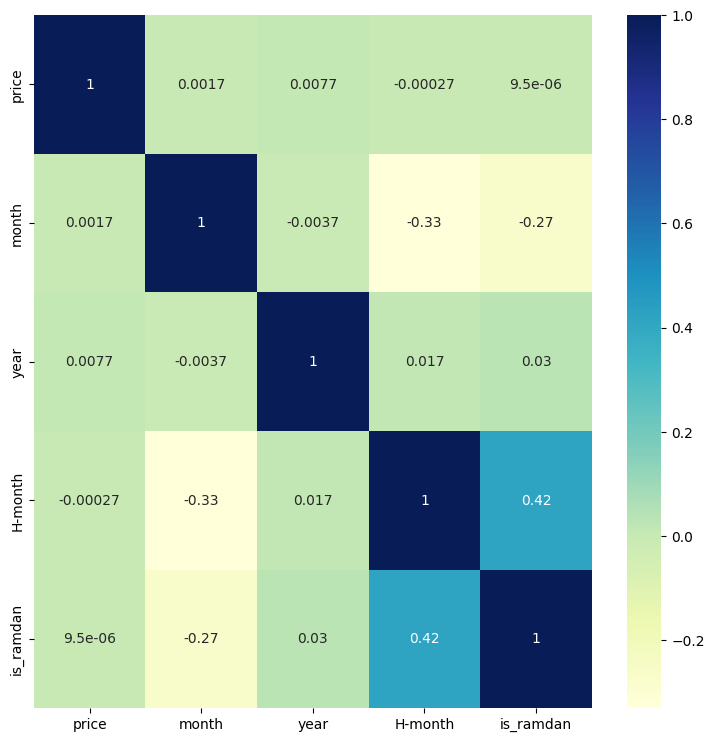

In [217]:
#Get correlation of each features in dataset
df2=df[df['year']>2016]
corrmat = df2.corr()
top_corr = features = corrmat.index
plt.figure(figsize = (9,9))
# It is better to draw a heatmap 
g = sns.heatmap(df2[top_corr].corr(), annot=True, cmap='YlGnBu')

# corrmat = df.corr()
# top_corr = features = corrmat.index
# plt.figure(figsize = (9,9))
# # It is better to draw a heatmap 
# g = sns.heatmap(df[top_corr].corr(), annot=True, cmap='YlGnBu')

# hypothesis testing 

## the change of prices vs number of war deaths

In [218]:
deaths_df = deaths_df.loc[(deaths_df.year > 2012)&(deaths_df.year < 2021) ] 
deaths_df


,year,avg_prices,middle_east,world,annual_change_avg_prices,annual_change_middle_east,annual_change_world
1,2013,1.197619,73836.0,92797.0,1.268371,35.476413,25.291298
2,2014,1.137683,81125.0,112722.0,-5.004607,9.871878,21.471599
3,2015,1.145595,69396.0,102369.0,0.695476,-14.457935,-9.184543
4,2016,0.985663,56775.0,87300.0,-13.960654,-18.186927,-14.720277
5,2017,1.026347,35347.0,67885.0,4.127600,-37.741964,-22.239404
6,2018,1.044464,20378.0,54914.0,1.765171,-42.348714,-19.107314
7,2019,1.031790,10790.0,51244.0,-1.213377,-47.050741,-6.683177
8,2020,1.223233,8806.0,49304.0,18.554394,-18.387396,-3.785809


### the change of prices vs number of war deaths ((in middle east))

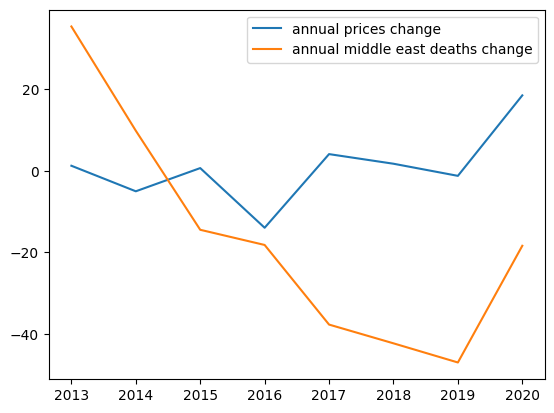

In [219]:
x=deaths_df['year']
y=deaths_df['annual_change_avg_prices']
y2=deaths_df['annual_change_middle_east']
plt.plot(x,y,label="annual prices change")
plt.plot(x,y2,label="annual middle east deaths change")
plt.legend()


### the change of prices vs number of war deaths ((world))

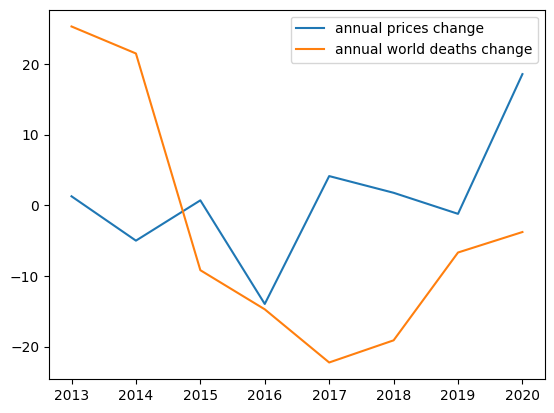

In [220]:
x=deaths_df['year']
y=deaths_df['annual_change_avg_prices']
y2=deaths_df['annual_change_world']
plt.plot(x,y,label="annual prices change")
plt.plot(x,y2,label="annual world deaths change")
plt.legend()



## 'annual_change_avg_prices vs  annual_change of population

In [221]:
population_df = population_df.loc[(population_df.year > 2012)]
population_df

,year,avg_prices,population,annual_change,annual_change_avg_prices
1,2013,1.840000,7694814,6.70,3.710662
2,2014,1.788333,8658026,12.52,-2.807971
3,2015,1.799167,9494246,9.66,0.605778
4,2016,1.852174,9964656,4.95,2.946211
5,2017,1.927153,10215381,2.25,4.048155
6,2018,1.876250,10459865,2.39,-2.641346
7,2019,1.812708,10698683,2.28,-3.386631
8,2020,1.808125,10928721,2.15,-0.252845
9,2021,2.140625,11148278,2.01,18.389215
10,2022,2.648819,11285869,1.23,23.740470


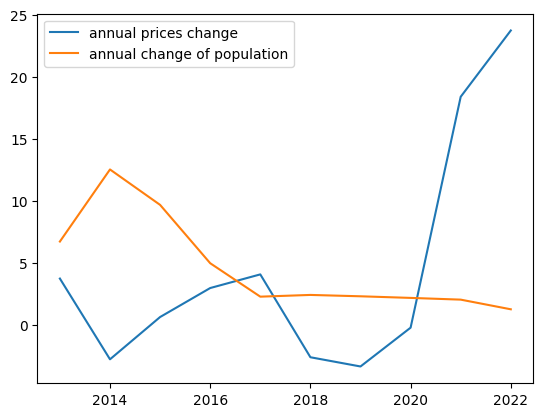

In [222]:
x=population_df['year']
y=population_df['annual_change_avg_prices']
y2=population_df['annual_change']
plt.plot(x,y,label="annual prices change")
plt.plot(x,y2,label="annual change of population")
plt.legend()


In [223]:
print(f"H0: the increasing of population increases the prices") 
print(f"H1: the increasing of population does not effect the prices") 

a, p_value = weightstats.ztest(population_df['annual_change_avg_prices'], alternative="two-sided")
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Null hyphothesis rejected")
else:
    print("Null hyphothesis cannot be rejected")

H0: the increasing of population increases the prices
H1: the increasing of population does not effect the prices
0.12960786861127047
Null hyphothesis cannot be rejected


## the effect of ramdan

#### the of price change over 11 year for commodity = Oil (vegetable)

In [224]:
df2=df[df['commodity']=='Oil (vegetable)'].groupby(['year','H-month'])['price'].mean().reset_index(name='price_change')
# df2.price_change=df2.price_change*100
df2.head(14)

,year,H-month,price_change
0,2012,1,1.72
1,2012,2,1.76
2,2012,3,1.66
3,2012,4,1.65
4,2012,5,1.67
5,2012,6,1.68
6,2012,7,1.75
7,2012,8,1.99
8,2012,9,1.88
9,2012,10,1.88


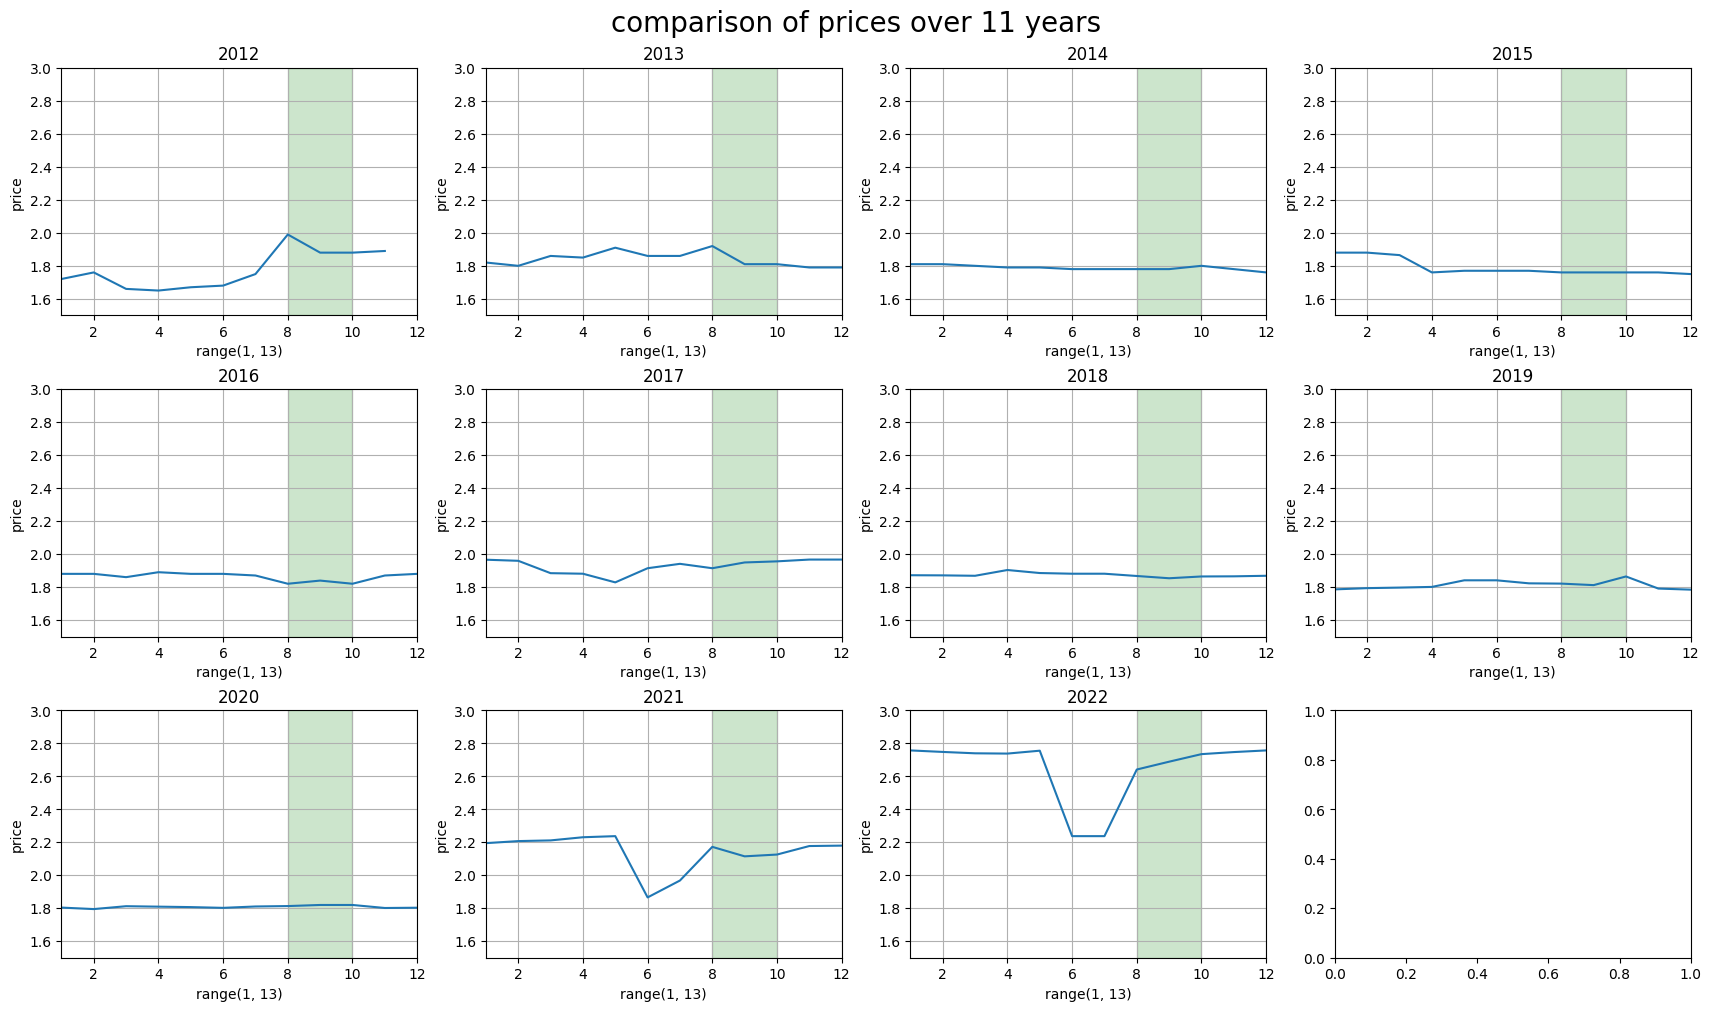

In [225]:
fig, axs = plt.subplots(len(df2['year'].unique())//4+1, 4, figsize=(17, 10), constrained_layout=True)
fig.suptitle('comparison of prices over 11 years',fontsize=20)
for ax,i in  zip(axs.flat,df2['year'].unique()):
    data=df2[df2['year']==i]
    x=data['H-month']
    y=data['price_change']
    ax.plot(x,y)
    ax.grid()
    ax.set_xlabel('month')
    ax.set_ylabel('price')
    ax.axvspan(8, 10, alpha=0.2, color='green')
    ax.set_xlim([1,12])
    ax.set_ylim([1.5,3])
    ax.set_xlabel(range(1,13,1))
    ax.set_title(i)

#### the mean of price change for h-month = 8 and commodity 
* droping 2012 for being outlayer ((rice ))

In [226]:
df2=df[df['commodity']=='Meat (beef)'].groupby(['year','H-month'])['price'].mean().pct_change(periods=1).reset_index(name='price_change')
df2.price_change=df2.price_change*100
df2=df2[(df2['H-month']==8)]
print(df2)
print(f"the mean : {df2['price_change'].mean()}")

     year  H-month  price_change
2    2012        8     -0.970874
13   2013        8      1.835853
25   2014        8      0.425985
37   2015        8      0.000000
48   2016        8     -0.553097
60   2017        8     -2.359027
83   2019        8     -0.183524
94   2020        8      0.000000
106  2021        8     -2.516795
118  2022        8      1.236966
the mean : -0.3084513473734374


In [227]:

print("H0: before ramdan increase the prices")
print("H1: before ramdan dose not effect the prices") # true

a, p_value = weightstats.ztest(df2['price_change'], alternative="two-sided")
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Null hyphothesis rejected")
else:
    print("Null hyphothesis cannot be rejected")

H0: before ramdan increase the prices
H1: before ramdan dose not effect the prices
0.48187448293188107
Null hyphothesis cannot be rejected


#### the mean of price change for h-month = 9 (ramdan) and commodity 

In [228]:
df2=df[df['commodity']=='Meat (beef)'].groupby(['year','H-month'])['price'].mean().pct_change(periods=1).reset_index(name='price_change')
df2.price_change=df2.price_change*100
df2=df2[(df2['H-month']==9)]
print(df2)
print(f"the mean : {df2['price_change'].mean()}")

     year  H-month  price_change
3    2012        9      0.544662
14   2013        9      1.908802
26   2014        9      1.484624
38   2015        9     24.361702
49   2016        9     -5.413422
61   2017        9      1.864999
72   2018        9      1.494044
84   2019        9     -0.408580
95   2020        9      0.000000
107  2021        9      1.789755
119  2022        9      3.463597
the mean : 2.8263802489822556


In [229]:
v = 3
print(f"H0: ramdan dose not effect the prices") 
print(f"H1: ramdan decrease the prices in {v} %")  

a, p_value = weightstats.ztest(df2['price_change'], value=v, alternative="smaller")
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Null hyphothesis rejected")
else:
    print("Null hyphothesis cannot be rejected")

H0: ramdan dose not effect the prices
H1: ramdan decrease the prices in 3 %
0.469390652964425
Null hyphothesis cannot be rejected


#### the of price change over 11 year for commodity = Oil (vegetable)

<AxesSubplot: xlabel='H-month', ylabel='year'>

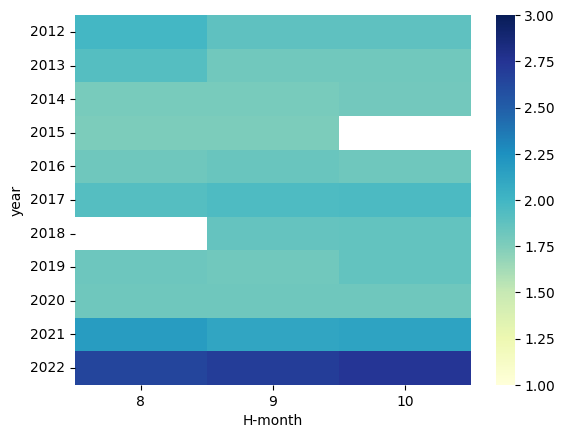

In [230]:
# create sample data
data =df[(df['is_ramdan'])& (df['commodity']=='Oil (vegetable)')]
table = pd.pivot_table(data, values='price', index='year', columns='H-month')

# create heat map
sns.heatmap(table, cmap='YlGnBu', annot=False, fmt='g',vmin=1,vmax=3)

# price changes with respect to market

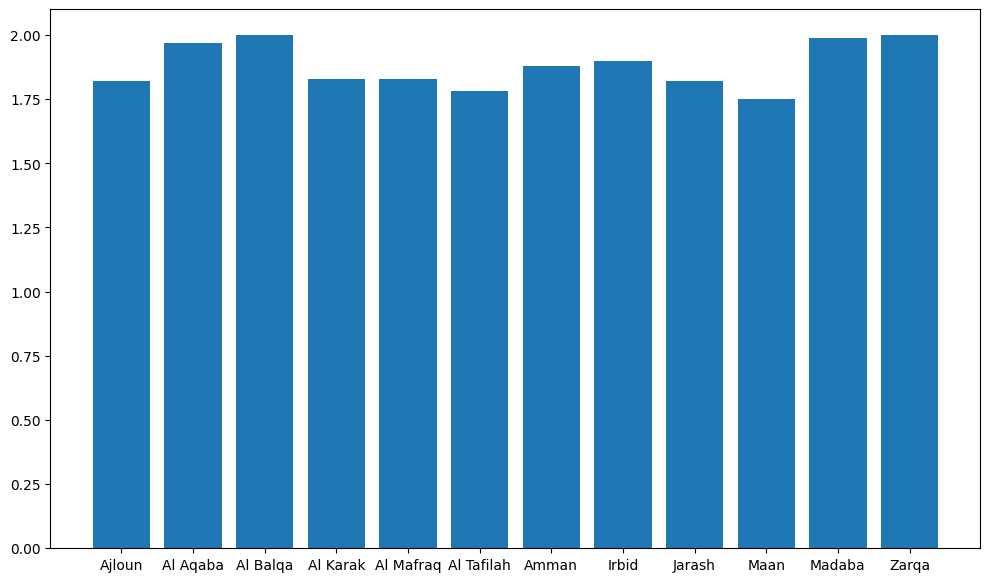

In [231]:
test = df[(df['year'] == 2017) & (df['commodity'] == 'Oil (vegetable)') & (df['month'] == 1)]
market = test['market'].head(12)
price = test['price'].head(12)

# Figure Size
fig = plt.figure(figsize =(12, 7))

# Horizontal Bar Plot
plt.bar(market, price)

# Show Plot
plt.show()

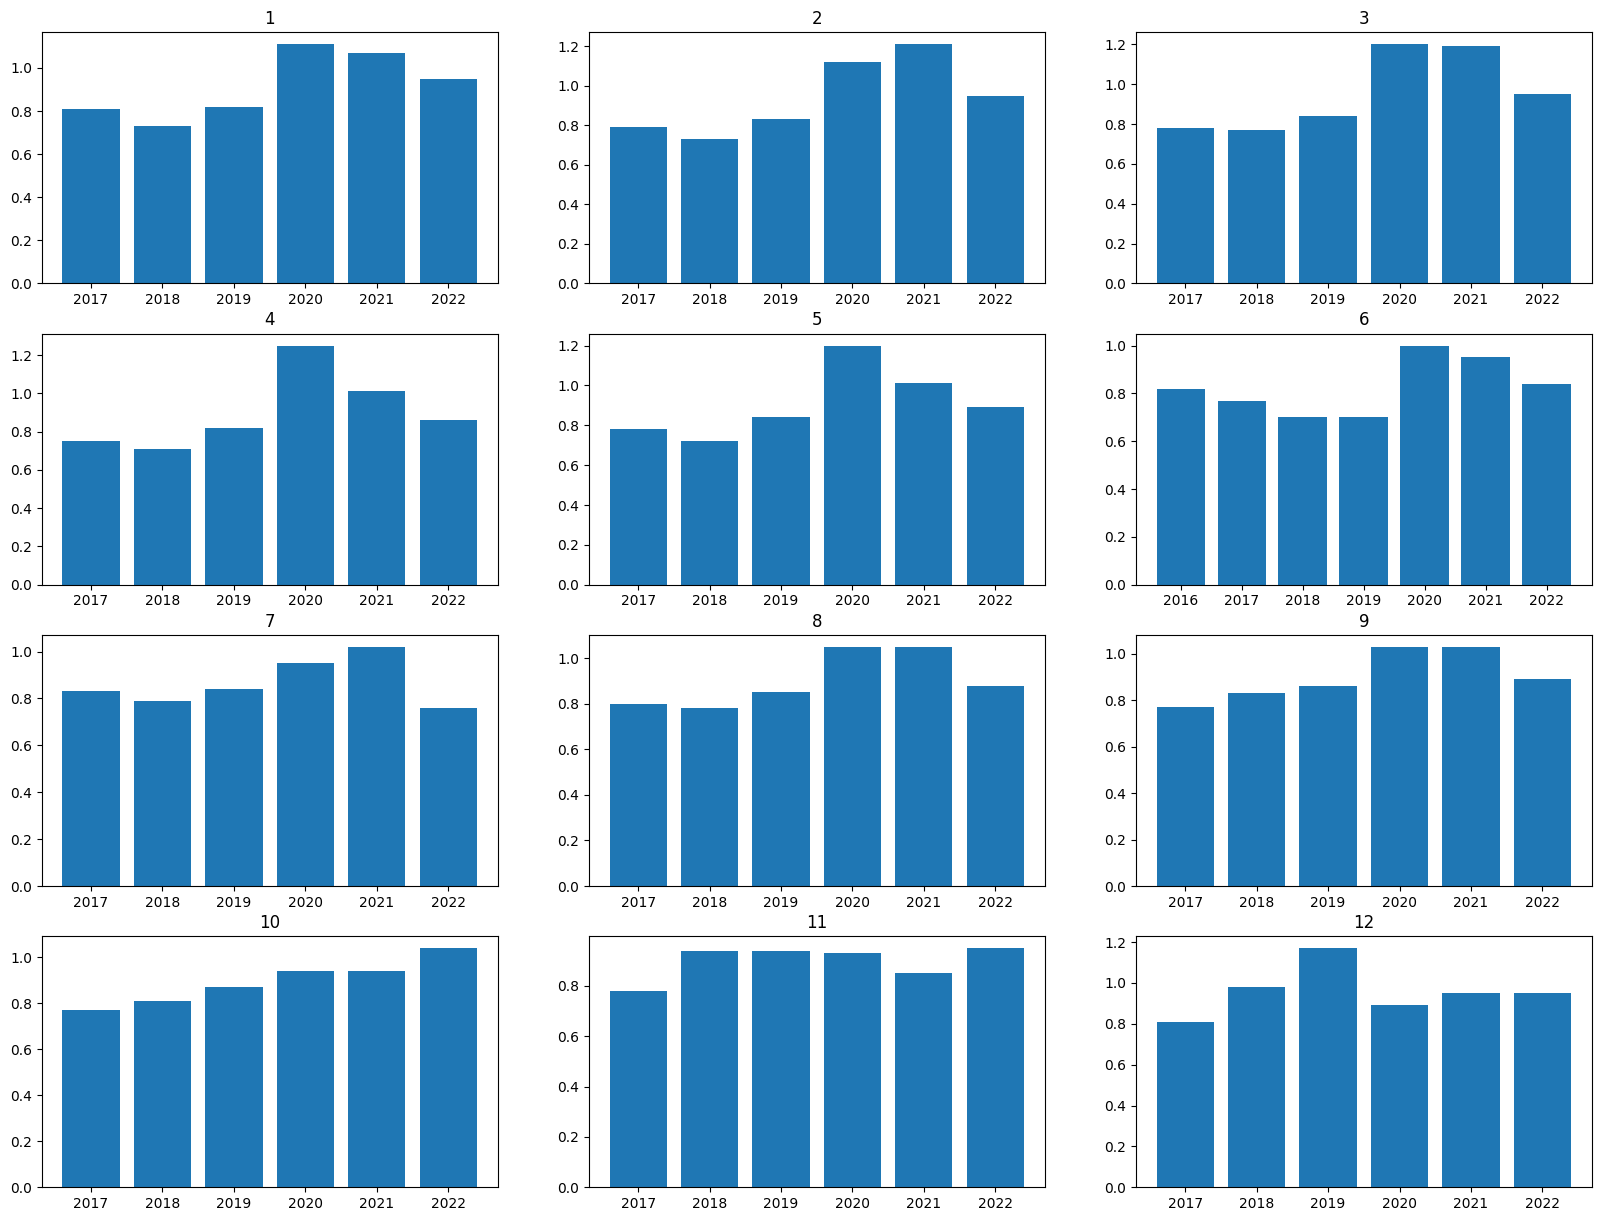

In [232]:
# test = df[(df['year'] == 2017) & (df['commodity'] == 'Oil (vegetable)') & (df['month'] == 2)]
figure, axis = plt.subplots(4, 3)
figure.set_figwidth(20)
figure.set_figheight(15)
r = 0
for m in range(1,13):
  test = df[(df['market'] == 'Irbid') & (df['commodity'] == 'Bananas') & (df['month'] == m)]
  years = test['year']
  price = test['price']

  # Figure Size
  # fig = plt.figure(figsize =(12, 7))

  # Horizontal Bar Plot
  axis[r, (m-1)%3].bar(years, price)
  axis[r, (m-1)%3].set_title(m)
  # axis[r, (m-1)%3].figure(figsize =(12, 7))
  if((m-1)%3 == 2):
    r+=1

# Show Plot
plt.show()

# avg prices for diffrent commodity


In [233]:
df[df['year']==2014].groupby('commodity')['price'].mean()

commodity
Apples (red)               2.299167
Bananas                    0.860833
Beans (fava, dry)          1.545833
Bread (pita)               0.170000
Cheese (white, boiled)     5.251667
Chickpeas                  1.759167
Cucumbers                  0.639167
Eggs                       3.243333
Garlic                     1.919167
Lentils                    1.187500
Meat (beef)                9.532500
Meat (chicken)             2.264167
Meat (chicken, whole)      1.767500
Meat (lamb)               11.740000
Milk (pasteurized)         1.155833
Oil (olive)                4.920000
Oil (vegetable)            1.788333
Onions                     0.598333
Oranges (big size)         1.069000
Potatoes                   0.748333
Rice (imported)            1.208333
Sugar                      0.728333
Tomatoes                   0.566667
Name: price, dtype: float64

In [234]:
df[df['year']==2022].groupby('commodity')['price'].mean()

commodity
Apples (red)              1.387153
Bananas                   0.875152
Beans (fava, dry)         1.515694
Bread (pita)              0.323125
Bulgur                    0.896597
Cheese (picon)            0.774028
Cheese (white, boiled)    5.728819
Chickpeas                 1.863750
Cucumbers                 0.577500
Eggs                      2.655972
Fish (tuna, canned)       1.117361
Fuel (diesel)             0.719167
Fuel (gas)                7.000000
Fuel (kerosene)           0.715833
Fuel (petrol-gasoline)    0.904167
Garlic                    3.186806
Lentils                   1.262847
Meat (beef)               8.508403
Meat (chicken)            2.210486
Meat (chicken, whole)     1.542639
Meat (lamb)               9.980625
Milk (pasteurized)        1.097361
Milk (powder)             3.916111
Oil (olive)               6.338125
Oil (vegetable)           2.648819
Onions                    0.547014
Oranges (big size)        1.257087
Pasta                     0.362431
Potatoes  

In [235]:
df[df['category']=='non-food'].groupby('month')['price'].mean()

month
1     2.546304
2     2.602210
3     2.550870
4     2.546957
5     2.553043
6     2.574783
7     2.584710
8     2.591739
9     2.594348
10    2.598261
11    2.603478
12    2.602174
Name: price, dtype: float64

(0.0, 1.0)

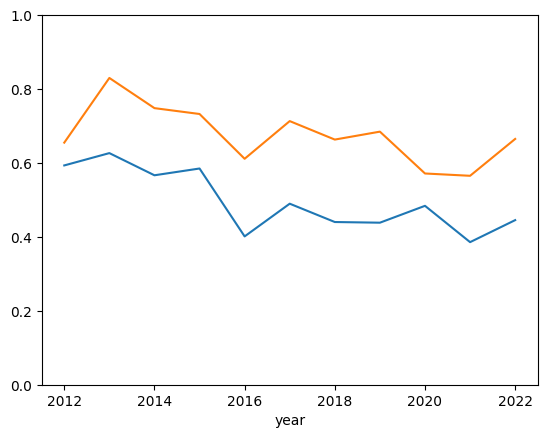

In [236]:
df[df['commodity']=='Tomatoes'].groupby('year')['price'].mean().plot()
df[df['commodity']=='Potatoes'].groupby('year')['price'].mean().plot()
plt.ylim([0,1])

<AxesSubplot: xlabel='year,month'>

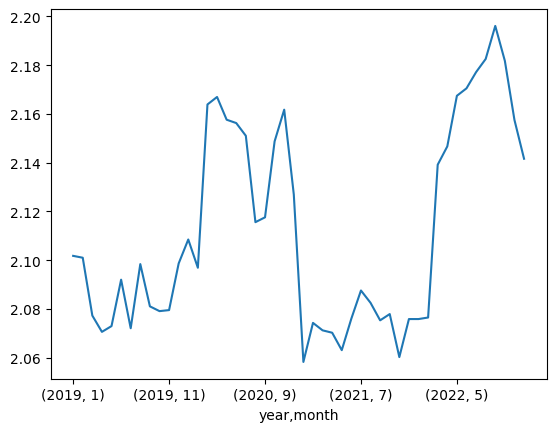

In [237]:
df[(df['year']>2018)].groupby(['year','month'])['price'].mean().plot(x='month',y='price')
# plt.ylim()

In [238]:
df[df['commodity']=='Oil (vegetable)'][df['market']=='Amman'][df.year==2022][['month','price']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2035138417.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']=='Amman'][df.year==2022][['month','price']]


,month,price
26145,1,2.32
26557,2,2.32
26972,3,2.65
27391,4,2.68
27810,5,2.74
28228,6,2.74
28644,7,2.77
29058,8,2.77
29471,9,2.78
29884,10,2.79


In [239]:
avg=df[df['commodity']=='Oil (vegetable)'].groupby('month')['price'].mean().reset_index(name="avg_price")
avg

,month,avg_price
0,1,1.924286
1,2,1.918052
2,3,2.024805
3,4,2.026883
4,5,2.026364
5,6,2.026705
6,7,2.043766
7,8,2.047013
8,9,2.047922
9,10,2.048312


# data exploration

In [240]:
df.groupby('year')['commodity'].unique()


year
2012    [Bread (pita), Rice (imported), Oil (vegetable...
2013    [Bread (pita), Potatoes, Rice (imported), Eggs...
2014    [Bread (pita), Potatoes, Rice (imported), Eggs...
2015    [Bread (pita), Potatoes, Rice (imported), Eggs...
2016    [Bread (pita), Potatoes, Rice (imported), Eggs...
2017    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2018    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2019    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2020    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2021    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2022    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
Name: commodity, dtype: object

In [241]:
df['category'].value_counts()

vegetables and fruits    6965
meat, fish and eggs      5450
cereals and tubers       5238
milk and dairy           3483
non-food                 3312
pulses and nuts          2749
oil and fats             1864
miscellaneous food       1793
Name: category, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2806511603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==202

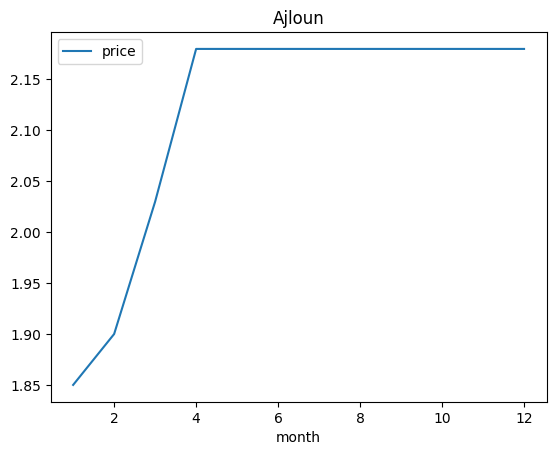

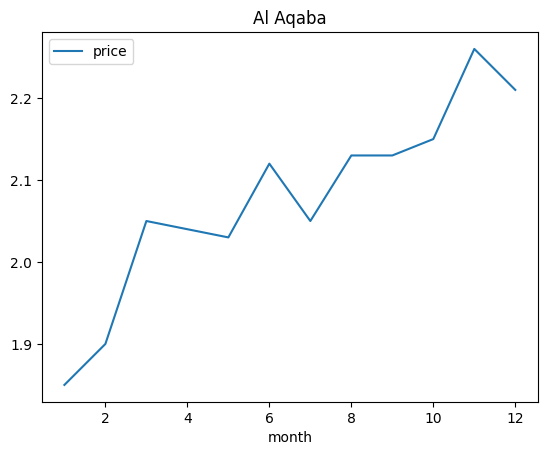

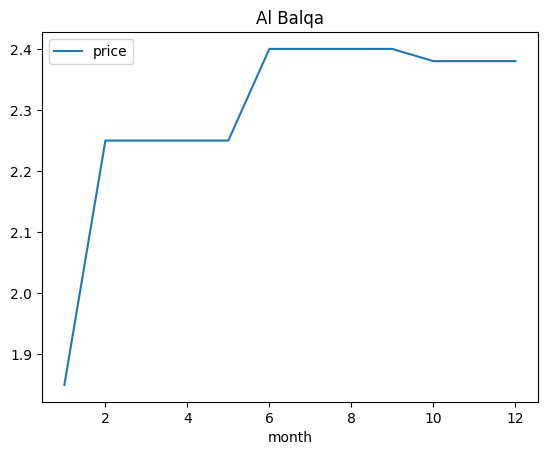

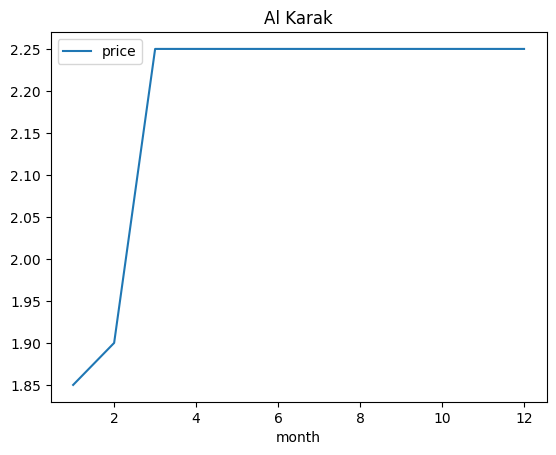

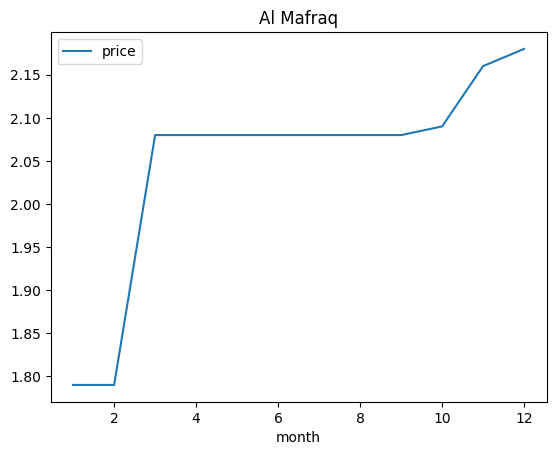

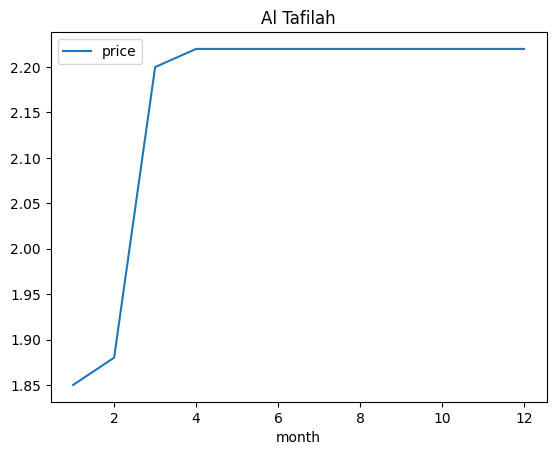

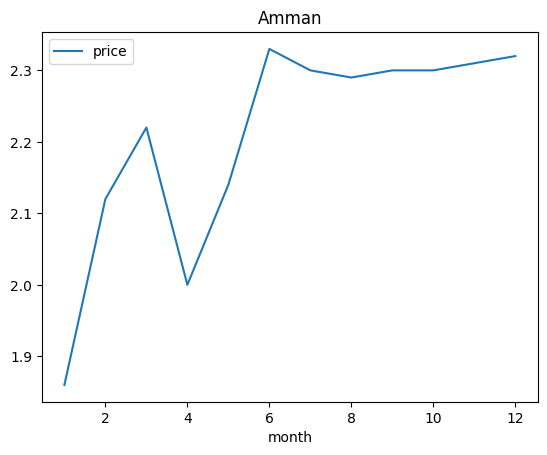

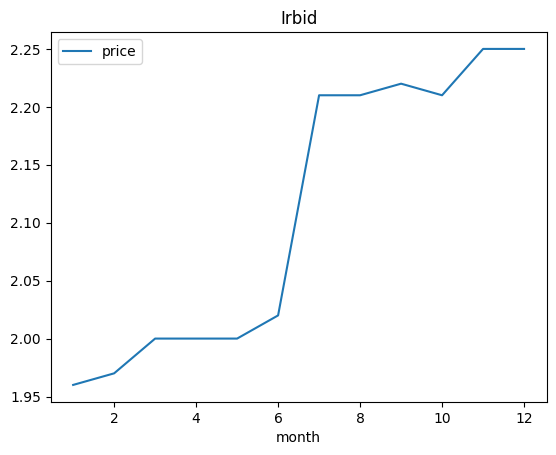

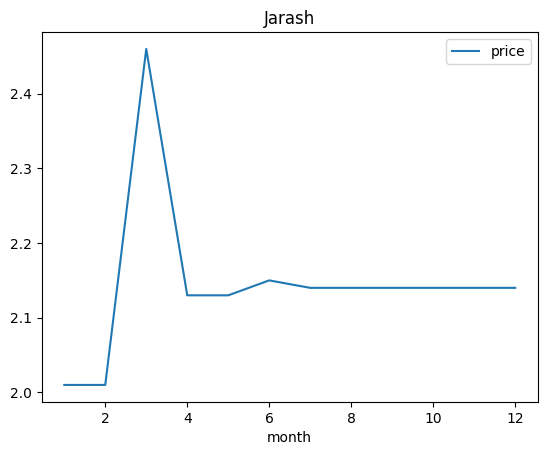

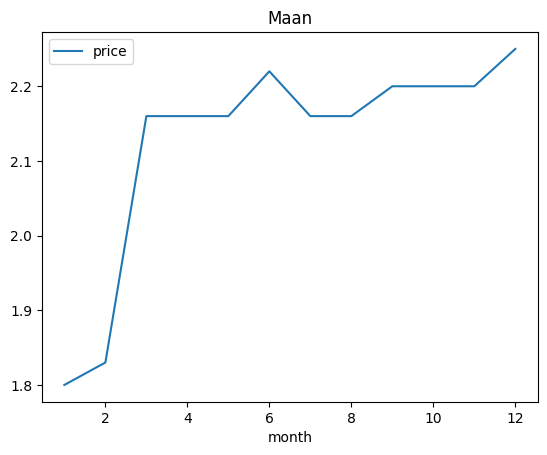

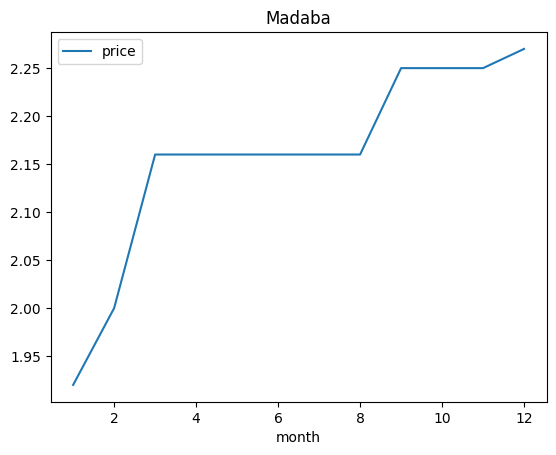

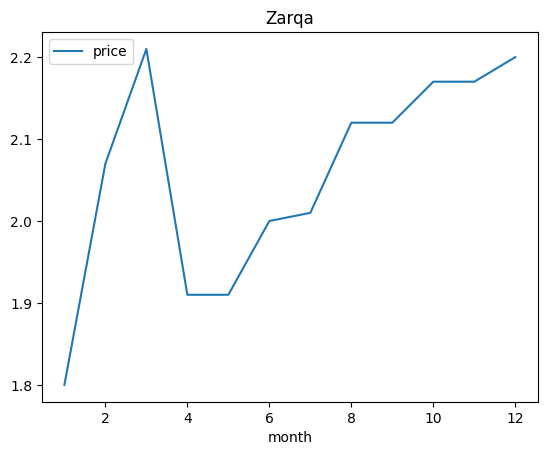

In [242]:
for i in df['market'].unique()[1:]:
    df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
    plt.title(i)
    plt.xticks()
    #plt.xlim([0,13])
    #plt.ylim([0,3])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22608\2379536583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
C:\Users\LENOVO\

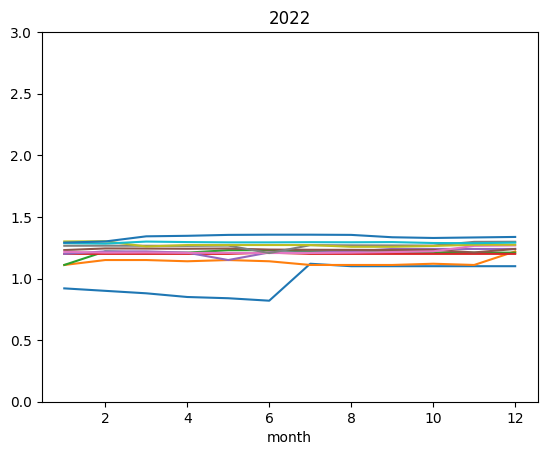

In [243]:
for i in df['year'].unique():
    df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
    plt.title(i)
    plt.ylim([0,3])
    

In [244]:
df.isna().sum()

market       0
category     0
commodity    0
unit         0
price        0
month        0
year         0
H-month      0
is_ramdan    0
dtype: int64

In [245]:
df['market'].value_counts()


Al Karak            2498
Amman               2498
Irbid               2494
Al Mafraq           2482
Ajloun              2481
Zarqa               2480
Jarash              2477
Al Balqa            2475
Madaba              2452
Al Tafilah          2439
Maan                2436
Al Aqaba            2376
National Average    1266
Name: market, dtype: int64

In [246]:
df['category'].value_counts()

vegetables and fruits    6965
meat, fish and eggs      5450
cereals and tubers       5238
milk and dairy           3483
non-food                 3312
pulses and nuts          2749
oil and fats             1864
miscellaneous food       1793
Name: category, dtype: int64

In [247]:
df['commodity'].value_counts()


Fuel (petrol-gasoline)    1008
Fuel (kerosene)           1008
Fuel (gas)                1008
Bread (pita)               935
Oil (vegetable)            935
Rice (imported)            934
Sugar                      929
Tomatoes                   929
Garlic                     929
Cucumbers                  929
Chickpeas                  929
Oil (olive)                929
Beans (fava, dry)          929
Meat (lamb)                929
Meat (chicken, whole)      929
Eggs                       929
Potatoes                   929
Onions                     928
Meat (beef)                928
Apples (red)               926
Cheese (white, boiled)     925
Milk (pasteurized)         923
Meat (chicken)             895
Pasta                      879
Lentils                    879
Cheese (picon)             879
Bulgur                     879
Salt (iodised)             864
Bananas                    862
Fish (tuna, canned)        840
Spinach                    822
Milk (powder)              756
Wheat fl

In [248]:
df['unit'].value_counts()


KG         18987
L           4103
12.5 KG     1008
1.8 L        935
2 KG         929
300 G        875
160 G        875
750 G        864
170 G        840
0.8 KG       756
1.5 KG       682
Name: unit, dtype: int64

In [249]:
df['price'].describe()

count    30854.000000
mean         2.124174
std          2.439409
min          0.150000
25%          0.660000
50%          1.130000
75%          2.250000
max         15.300000
Name: price, dtype: float64